# **Assignment: Random Forest Regression for House Price Prediction**

## **Objective**  
Train and evaluate a **Random Forest Regression model** to predict house prices based on various features such as area, number of bedrooms, population, etc.

---

## **Dataset**  
Download the **USA Housing Price dataset** from Kaggle:  
🔗 [USA Housing Price Dataset](https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Drop irrelevant columns such as "Address" (if applicable).  
- Check and handle missing values.  
- Normalize numerical features using **StandardScaler**.  
- Split the dataset into **80% training and 20% testing**.  

---

### **2. Train Random Forest Regression Model**  
- Train a **Random Forest Regressor** with default parameters.  
- Evaluate its initial performance.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `n_estimators` (Number of trees in the forest)  
  - `max_depth` (Maximum depth of each tree)  
  - `min_samples_split` (Minimum samples required to split a node)  
  - `min_samples_leaf` (Minimum samples required at a leaf node)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Mean Squared Error (MSE)**  
  - **Mean Absolute Error (MAE)**  
  - **R² Score**  

---

### **5. Visualization**  
- Plot **Actual vs. Predicted values** for the Random Forest model.  
- Plot a **feature importance graph** to analyze which features contribute the most to house price prediction.  

---

## **Submission Guidelines**  
- Submit a **colab Notebook (.ipynb)** with code and visualizations.  


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
df = pd.read_csv(r"C:\Users\Administrator\Documents\Data Science Bootcamp\housing_train - housing_train.csv")

In [57]:

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
# Drop irrelevant columns if they exist
irrelevant_columns = ['Address', 'Id','PoolQC','Fence','Alley','MiscVal','MiscFeature']  # Add more if needed
df.drop(columns=[col for col in irrelevant_columns if col in df.columns], inplace=True)

In [59]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
numerical_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea','MoSold', 'YrSold']
categorical_features=['MSZoning', 'Street','LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive','SaleType', 'SaleCondition']
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [65]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 17571.93
Root Mean Squared Error (RMSE): 28374.98
R² Score: 0.90


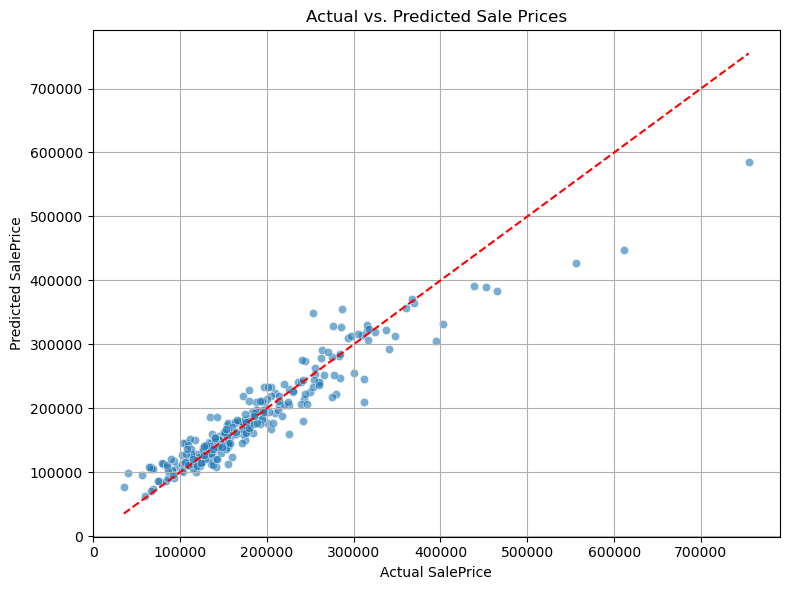

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted Sale Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

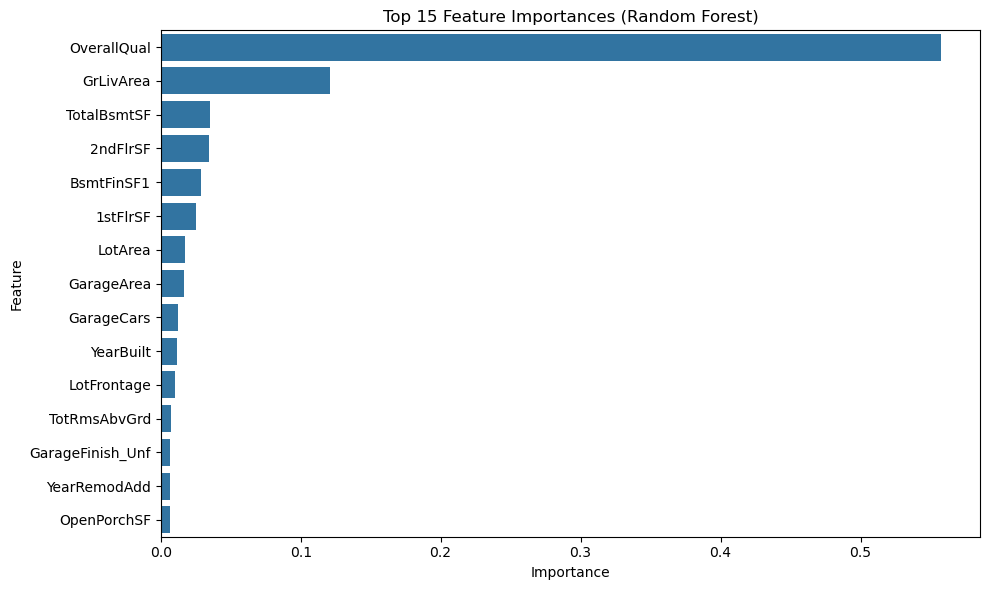

In [69]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()